## Collatz beta notebook

In [285]:
"""
This notebook analyses the betas of collatz sequences and their relationship
to other components.
"""

# Fix possible import problems
import sys
sys.path.append("..")

# Imports
from math import log2
from fractions import Fraction
import random as rnd
import matplotlib.pyplot as plt
import pandas as pd
from collatz import commons as com
from collatz import generator as gen


# Configuration
k = 3
max_value = 101
max_iterations = 30
start_value = rnd.randint(1, max_value)

if start_value % 2 == 0:
    start_value = start_value + 1

start_value = 95

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 10000)
pd.set_option('display.expand_frame_repr', False)

# Generate Collatz sequence
analysis_frame = gen.generate_odd_collatz_sequence(
    start_value=start_value, k=k, max_iterations=max_iterations)

# Drop last row
analysis_frame = analysis_frame[:-1]

# Derive additional fields
analysis_frame["n"] = analysis_frame.index + 1
analysis_frame.insert(1, "v_1", [start_value] * len(analysis_frame))

# Calculate alpha
analysis_frame["alpha_i"] = analysis_frame["next_collatz"].apply(com.trailing_zeros)
analysis_frame["alpha_i"] = analysis_frame["alpha_i"].astype("int64")
analysis_frame["alpha"] = analysis_frame["alpha_i"].cumsum()
analysis_frame["alpha_max"] = analysis_frame["n"] * log2(k) + log2(start_value)
analysis_frame["alpha_max"] = analysis_frame["alpha_max"].astype('int64') + 1
analysis_frame["alpha_cycle"] = (analysis_frame["n"] * log2(k)).astype('int64') + 1

# Calculate beta
analysis_frame["beta_i"] = 1 + 1/(k*analysis_frame["collatz"])
analysis_frame["beta"] = analysis_frame["beta_i"].cumprod()
analysis_frame["beta_log"] = analysis_frame["beta"].apply(log2)
analysis_frame["beta_log_max"] = analysis_frame["alpha_max"] - \
                             analysis_frame["n"] * log2(k) - log2(start_value)

analysis_frame["beta_log_cycle"] = (analysis_frame["n"] * log2(k)).astype('int64') + 1 - \
                                   analysis_frame["n"] * log2(k)

analysis_frame["beta_max"] = 2**analysis_frame["beta_log_max"]
analysis_frame["beta_cycle"] = 2**analysis_frame["beta_log_cycle"]

analysis_frame["beta_frac"] = analysis_frame["beta"].apply(
    Fraction.from_float).apply(Fraction.limit_denominator)

analysis_frame["beta_max_frac"] = analysis_frame["beta_max"].apply(
    Fraction.from_float).apply(Fraction.limit_denominator)

analysis_frame["beta_cycle_frac"] = analysis_frame["beta_cycle"].apply(
    Fraction.from_float).apply(Fraction.limit_denominator)

analysis_frame["bin_str"] = analysis_frame["collatz"].apply(com.to_binary)

# Print results
print_frame = analysis_frame[[
    "n", "collatz","next_odd",
    "beta", "beta_cycle", "beta_max",
    "alpha", "alpha_cycle", "alpha_max",
    "bin_str"
]]

print_frame.columns = ["n","v_i", "v_i+",
                       "b", "b_cycle", "b_max",
                       "a", "a_cycle", "a_max",
                       "bin_str"
]

final_beta = analysis_frame["beta"][len(analysis_frame)-1]

print("Start value:", start_value, " K:", k, 
      " Final beta:", final_beta, 
      "\n")

print(print_frame.to_string(index=False), "\n")

Start value: 95  K: 3  Final beta: 1.0379211724135042 

  n   v_i  v_i+         b   b_cycle     b_max   a  a_cycle  a_max       bin_str
  1    95   143  1.003509  1.333333  1.796491   1        2      9       1011111
  2   143   215  1.005848  1.777778  1.197661   2        4     10      10001111
  3   215   323  1.007407  1.185185  1.596881   3        5     12      11010111
  4   323   485  1.008447  1.580247  1.064587   4        7     13     101000011
  5   485    91  1.009140  1.053498  1.419450   8        8     15     111100101
  6    91   137  1.012837  1.404664  1.892600   9       10     17       1011011
  7   137   103  1.015301  1.872885  1.261733  11       12     18      10001001
  8   103   155  1.018587  1.248590  1.682311  12       13     20       1100111
  9   155   233  1.020777  1.664787  1.121541  13       15     21      10011011
 10   233   175  1.022238  1.109858  1.495388  15       16     23      11101001
 11   175   263  1.024185  1.479811  1.993850  16       18     2

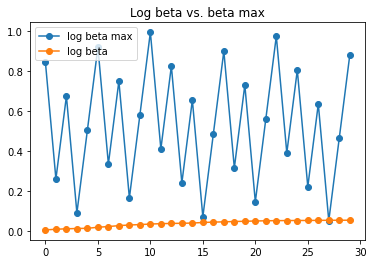

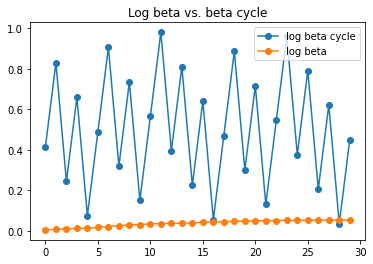

In [286]:
# Plot results
plt.figure()
plt.title("Log beta vs. beta max")
plt.plot(analysis_frame["beta_log_max"], "-o", label="log beta max")
plt.plot(analysis_frame["beta_log"], "-o", label='log beta')
plt.legend()

plt.figure()
plt.title("Log beta vs. beta cycle")
plt.plot(analysis_frame["beta_log_cycle"], "-o", label="log beta cycle")
plt.plot(analysis_frame["beta_log"], "-o", label='log beta')
plt.legend()
plt.show()
